# Library Needed

In [147]:
# BASE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time

# ----------------------------
# INSTALL
# !pip install mlxtend

# ----------------------------
# TRANSACTION ENCODER
from mlxtend.preprocessing import TransactionEncoder

# ----------------------------
# APRIORI FUNCTION
from mlxtend.frequent_patterns import apriori, association_rules

# ----------------------------
# ITERTOOLS
import itertools

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [148]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    print(f"Total data adalah: {data.shape[0]} Baris")
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [149]:
def check_duplicates(dataframe):
    """
    Memeriksa nilai duplikat dari DataFrame.
    """
    # Menampilkan nilai duplikat
    print("Nilai Duplikat (10 Teratas):")
    duplicate_values = dataframe[dataframe.duplicated()]
    print(f"Jumlah Duplikat data: {duplicate_values.shape[0]}")
    display(duplicate_values.head(10))

# Import Data

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Project [Data Bridge]/Analisis Pola Asosiasi Gangguan Jaringan IT Menggunakan Algoritma Apriori dan FP-Growth/Data/Dataset Association Rule Mining Gangguan.xlsx')

# Explore & Preprocessing Data

In [152]:
missing_data(df) # No Missing Data detect here, but actually there is some data with "-" and it's maybe a missing data...

Total data adalah: 7141 Baris


,Total,Percent
Ticket ID,0,0.00
Incident ID,0,0.00
BULAN,0,0.00
Created On,0,0.00
Service ID,0,0.00
Product,0,0.00
Interference (Incident ID) (Incident),0,0.00


In [153]:
check_duplicates(df)# No Duplicated Data, So Just Go on

Nilai Duplikat (10 Teratas):
Jumlah Duplikat data: 0


,Ticket ID,Incident ID,BULAN,Created On,Service ID,Product,Interference (Incident ID) (Incident)


In [154]:
# Rename Columns to something simpler
df.rename(columns={"BULAN": "Month", "Interference (Incident ID) (Incident)": "Interference(Incident)"}, inplace=True)

In [155]:
# Checks the value "-", whichever column contains it

for _, i in enumerate(df.columns):
  if df[df[i] == '-'].shape[0] == 0:
    continue
  else:
    print(f"\n {_}. {i}")
    display(df[df[i] == "-"].head(10))
    print(f"Jumlah value '-' adalah {df[df[i] == '-'].shape[0]}")


 1. Incident ID


,Ticket ID,Incident ID,Month,Created On,Service ID,Product,Interference(Incident)
3917,REBNMJMN,-,6,2023-06-26 11:21:00,1000094154,IPVPN,-
4038,REBNKCP3,-,6,2023-06-22 11:37:00,990000020264878,IPVPN,-
4132,REBBE8SC,-,6,2023-06-05 00:11:00,990000320269478,IPVPN,-
4234,RR9LJ7WX,-,6,2023-07-02 12:55:00,1000296826,IPVPN,-
4244,RR9LJ75R,-,6,2023-07-02 13:02:00,1000118377,IPVPN,-
4389,RR9LJKK2,-,6,2023-07-02 12:49:00,1000327407,IPVPN,-
4398,RR9LCDPB,-,6,2023-05-31 16:40:00,990000320433811,IPVPN,-
4408,RR9LC5Y8,-,6,2023-05-31 12:40:00,10000007240197,IPVPN,-
4708,RR9XYBG2,-,7,2023-07-31 15:23:00,990000320272385,IPVPN,-
4919,RYZ39CVL,-,8,2023-09-01 08:14:00,1000137053,METRO ETHERNET QINQ,-


Jumlah value '-' adalah 65

 6. Interference(Incident)


,Ticket ID,Incident ID,Month,Created On,Service ID,Product,Interference(Incident)
3917,REBNMJMN,-,6,2023-06-26 11:21:00,1000094154,IPVPN,-
4038,REBNKCP3,-,6,2023-06-22 11:37:00,990000020264878,IPVPN,-
4119,REBBVJ58,23062305668,6,2023-06-14 17:49:00,990000020276831,IPVPN,-
4132,REBBE8SC,-,6,2023-06-05 00:11:00,990000320269478,IPVPN,-
4234,RR9LJ7WX,-,6,2023-07-02 12:55:00,1000296826,IPVPN,-
4244,RR9LJ75R,-,6,2023-07-02 13:02:00,1000118377,IPVPN,-
4389,RR9LJKK2,-,6,2023-07-02 12:49:00,1000327407,IPVPN,-
4398,RR9LCDPB,-,6,2023-05-31 16:40:00,990000320433811,IPVPN,-
4408,RR9LC5Y8,-,6,2023-05-31 12:40:00,10000007240197,IPVPN,-
4708,RR9XYBG2,-,7,2023-07-31 15:23:00,990000320272385,IPVPN,-


Jumlah value '-' adalah 503


In [156]:
# Replace the "-" value with the integer 0 in the 'Incident ID' column
df['Incident ID'] = df['Incident ID'].replace("-", 0).astype(int)
# Replace the "-" value with the NaN Value in the 'Interference(Incident)' column
df['Interference(Incident)'] = df['Interference(Incident)'].replace("-", np.nan)

In [157]:
display(missing_data(df)) # Missing value is only 7% of the total data, so we just drop it

Total data adalah: 7141 Baris


,Total,Percent
Interference(Incident),503,7.04
Ticket ID,0,0.00
Incident ID,0,0.00
Month,0,0.00
Created On,0,0.00
Service ID,0,0.00
Product,0,0.00


In [158]:
df = df.dropna(subset="Interference(Incident)")

In [159]:
df.shape

(6638, 7)

In [160]:
# There are some values that are likely due to human error in data input, so we get a "#" at the end
df['Service ID'] = df['Service ID'].replace('0990000320479567#', "0990000320479567")
df['Service ID'] = df['Service ID'].replace('0990000320520808#', "0990000320479567")

In [161]:
# Mengonversi kolom 'Incident ID' dan 'Ticket ID' ke dalam tipe data integer
df['Incident ID'] = df['Incident ID'].astype(int)

In [162]:
df['Service ID'] = df['Service ID'].astype(int)

In [163]:
df.reset_index(drop=True, inplace = True)

In [164]:
for n, c in enumerate(df.columns):
  is_unique = df[c].is_unique
  if is_unique == True:
    print(f"{n}. [{c}] column is Unique")
  else:
    print(f"{n}. [{c}] column isn't Unique")

0. [Ticket ID] column is Unique
1. [Incident ID] column isn't Unique
2. [Month] column isn't Unique
3. [Created On] column isn't Unique
4. [Service ID] column isn't Unique
5. [Product] column isn't Unique
6. [Interference(Incident)] column isn't Unique


# Data Visualization

In [165]:
def annotate_bars(ax, values, offset_x=0, offset_y=0):
    for i, value in enumerate(values):
        ax.annotate(f'{value}', xy=(i, value), xytext=(offset_x, offset_y), textcoords="offset points",
                    ha='center', va='bottom')

In [166]:
def annotate_bars_h(ax, values, offset_x=0, offset_y=0):
    for i, value in enumerate(values):
        ax.annotate(f'{value}', xy=(value, i), xytext=(offset_x, offset_y), textcoords="offset points",
                    ha='left', va='center')

## frequency of appearance for each product

In [210]:
# Mengganti nilai "IP VPN" menjadi "IPVPN"
df['Product'] = df['Product'].replace('IP VPN', 'IPVPN')

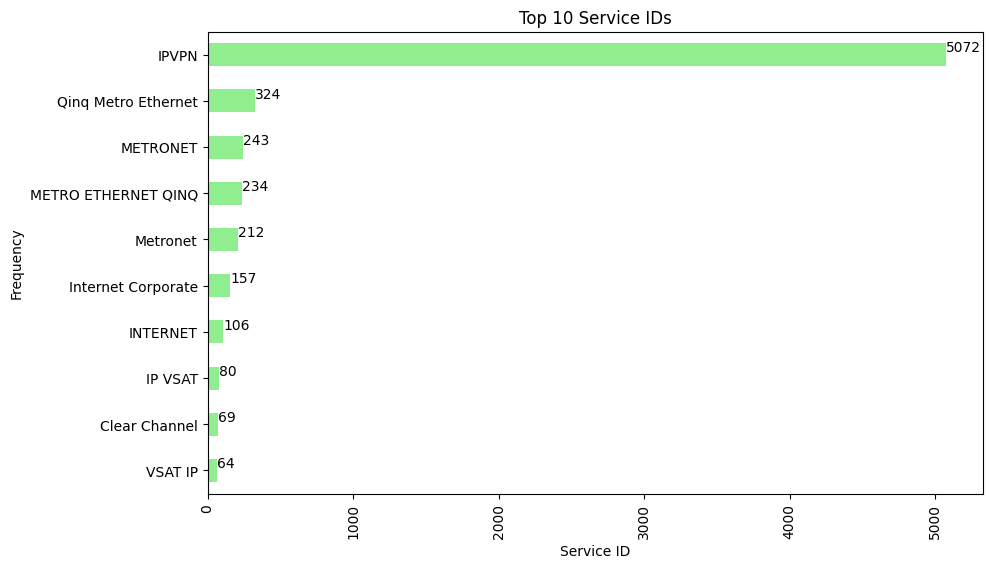

In [211]:
top_service_ids = df['Product'].value_counts().head(10).sort_values(ascending=True)

# Visualisasi top 10 Service ID
plt.figure(figsize=(10, 6))
top_service_ids.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Service IDs')
plt.xlabel('Service ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
annotate_bars_h(plt.gca(), top_service_ids, offset_y=5)
plt.show()

## Frequency of occurrence for each Service ID

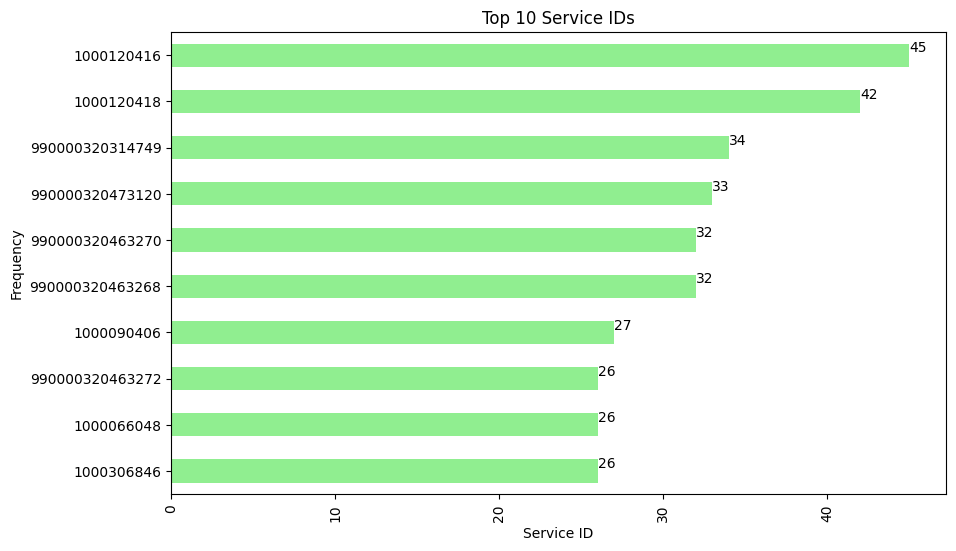

In [169]:
top_service_ids = df['Service ID'].value_counts().head(10).sort_values(ascending=True)

# Visualisasi top 10 Service ID
plt.figure(figsize=(10, 6))
top_service_ids.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Service IDs')
plt.xlabel('Service ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
annotate_bars_h(plt.gca(), top_service_ids, offset_y=5)
plt.show()

## Frequency of occurrence for each Interference(Incident)

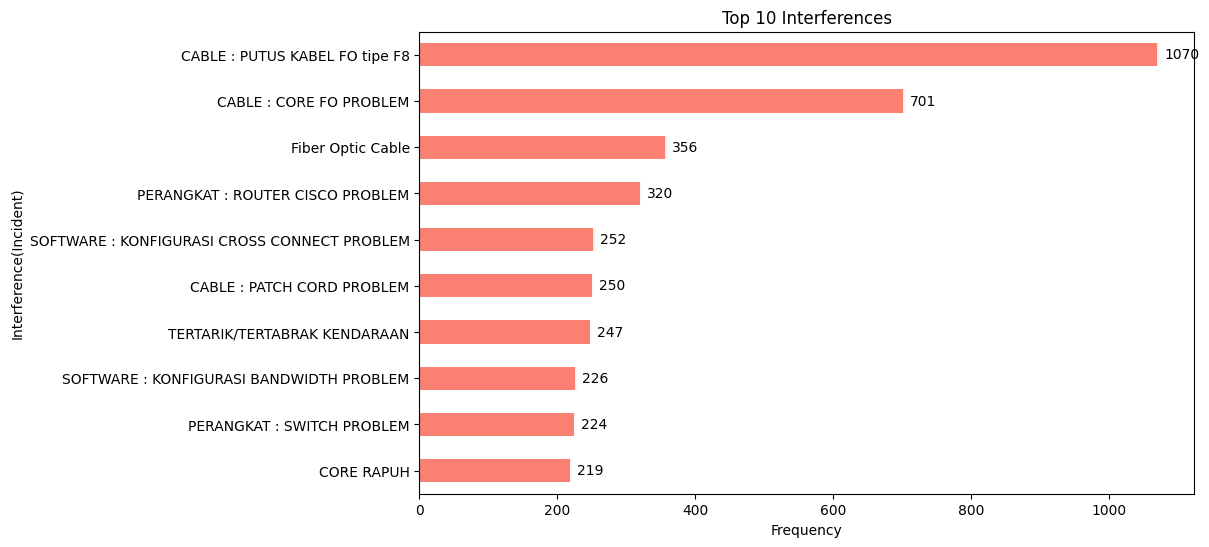

In [170]:
# Calculate top 10 Interferences
top_interferences = df['Interference(Incident)'].value_counts().head(10).sort_values(ascending=True)

# Visualize top 10 Interferences
plt.figure(figsize=(10, 6))
top_interferences.plot(kind='barh', color='salmon')
plt.title('Top 10 Interferences')
plt.xlabel('Frequency')
plt.ylabel('Interference(Incident)')
plt.xticks(rotation=0)

# Annotate bars
annotate_bars_h(plt.gca(), top_interferences, offset_x=5)

plt.show()

## Total number of entries for each month

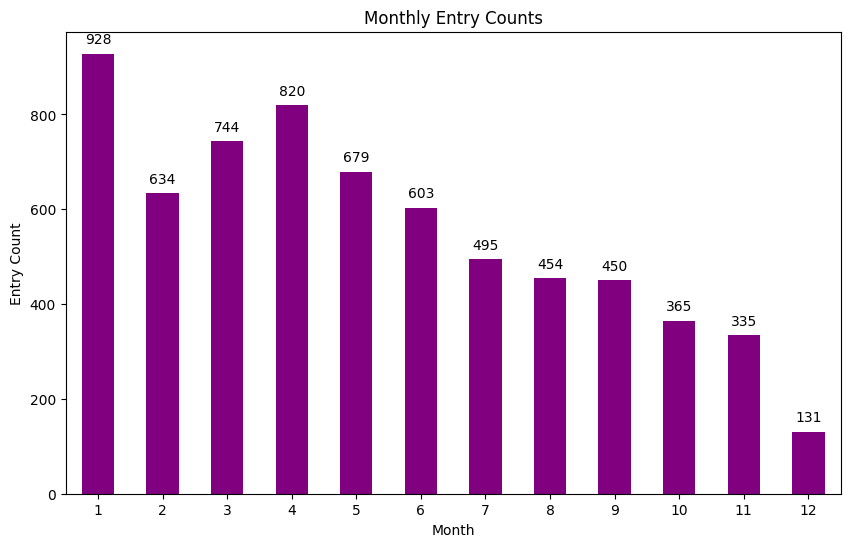

In [171]:
monthly_counts = df.groupby('Month').size()

# Visualisasi jumlah keseluruhan entri untuk setiap bulan
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='purple')
plt.title('Monthly Entry Counts')
plt.xlabel('Month')
plt.ylabel('Entry Count')
plt.xticks(rotation=0)
annotate_bars(plt.gca(), monthly_counts, offset_y=5)
plt.show()

# Apriori Requirements

1. Ubah dataset ke dalam format yang sesuai untuk analisis asosiasi. Pastikan setiap baris mewakili satu transaksi atau kejadian, dan atribut atau variabel yang akan dianalisis adalah Interference(Incident).

2. Transformasi dataset menjadi format transaksi atau itemset. Ini berarti setiap transaksi atau kejadian harus berisi kumpulan item yang terjadi bersamaan atau berurutan. Dalam kasus ini, Anda akan ingin melihat apakah ada pola asosiasi antara jenis-jenis gangguan yang terjadi.

Contoh:

|   Transaction ID | Items                  |
|------------------|------------------------|
|               1  | {'item1', 'item2', 'item5'} |
|               2  | {'item2', 'item4'}         |
|               3  | {'item1', 'item2', 'item4'} |
|               4  | {'item1', 'item3'}         |
|               5  | {'item2', 'item3'}         |

## First Way

In [172]:
# Group by 'Service ID' and aggregate 'Interference(Incident)' as sets
interference_itemsets = df.groupby('Service ID')['Interference(Incident)'].apply(set).reset_index()
# Rename columns
interference_itemsets.columns = ['Service ID', 'Interference(Incident) Set']

# Print DataFrame
interference_itemsets

,Service ID,Interference(Incident) Set
0,1000001749,"{SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, Fib..."
1,1000001771,"{SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, COR..."
2,1000001820,"{SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, CAB..."
3,1000003671,{VANDALISME}
4,1000003673,"{PERANGKAT : MODUL PROBLEM, PUTUS PROTECT}"
...,...,...
1910,990000320656159,{PERANGKAT : ROUTER CISCO PROBLEM}
1911,990000320657940,"{CABLE : PUTUS KABEL FO tipe F8, LAINNYA, Fibe..."
1912,990000320682576,{HARDWARE}
1913,990000320682672,"{CABLE : PUTUS KABEL FO tipe F8, JB_RUSAK}"


In [173]:
# Convert the set of incidents into a list of lists
transactions = list(interference_itemsets['Interference(Incident) Set'])

In [174]:
transactions[:3]

[{'Fiber Optic Cable',
  'MODUL PROBLEM',
  'PERANGKAT : ROUTER CISCO PROBLEM',
  'POWER : AC SUPPLY POWER LOST DI POP',
  'SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM'},
 {'CORE RAPUH',
  'Fiber Optic Cable',
  'LISTRIK LASTMILE MATI',
  'MODUL PROBLEM',
  'PERANGKAT : ROUTER CISCO PROBLEM',
  'POWER : AC SUPPLY POWER LOST DI POP',
  'SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM',
  'SOFTWARE : KONFIGURASI DI SWITCH PROBLEM'},
 {'AC SUPPLY POWER LOST DI POP',
  'CABLE : PATCH CORD PROBLEM',
  'Fiber Optic Cable',
  'MODUL PROBLEM',
  'PERANGKAT : CARD MODUL PROBLEM',
  'PERANGKAT : ROUTER CISCO PROBLEM',
  'SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM'}]

In [175]:
# Initialize and fit the transaction encoder
encoder = TransactionEncoder()
encoder_array = encoder.fit_transform(transactions)

In [176]:
encoder_array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [177]:
# Convert the encoded array into a DataFrame
df_encoded = pd.DataFrame(encoder_array, columns=encoder.columns_)

In [178]:
df_encoded

,AC SUPPLY POWER LOST DI LASTMILE,AC SUPPLY POWER LOST DI POP,ADAPTOR CONVERTER PROBLEM,ADAPTOR ROUTER,ANTENA VSAT PROBLEM,ATS/COS PROBLEM,BAD PERFOMANCE PIHAK KETIGA,BAD SPLICING,BATTERY / RECTIFIER PROBLEM,BATTERY PROBLEM,BENCANA ALAM,BW REDUCE,CABLE : CORE BENDING,CABLE : CORE FO PROBLEM,CABLE : FO BENDING,CABLE : PATCH CORD PROBLEM,CABLE : PUTUS KABEL FO tipe F8,CABLE POWER PROBLEM,CARD MODUL PROBLEM,CDWM_PUTUS CORE,CONFIGURATION ERROR,CONNECTOR BAD,CONNECTOR BULKHEAD PROBLEM,CONVERTER PROBLEM,CONVERTER/SFP PROBLEM,CORE BENDING,CORE FO PROBLEM,CORE FO TEGANG / TERTEKUK,CORE RAPUH,CWDM - BEBERAPA PORT / LAMDA TIDAK BERFUNGSI BAIK,CWDM - REDAMAN BESAR,CWDM - UNIT RUSAK,DIGIGIT BINATANG,DISTRIBUSI CUT,DNS PROBLEM,DROPWIRE BENDING,DROPWIRE CUT,DRYBAND/INDUKSI,DWDM PROBLEM,EXTERNAL ALARM PROBLEM,FDT BROKEN,FEEDER BENDING,FEEDER CUT,FO CUT,FULL TRAFFIC,Fiber Optic Cable,Fiber Optic Terminal,GANGGUAN SISI PERANGKAT USER,GPON BROKEN /HANG DUE TO OVER HEAT,GPON BROKEN DUE TO LIFETIME/PERFORMANCE,HARDWARE,IMPACT PEKERJAAN PROYEK,INVERTER PROBLEM,JB_AKTIVITAS TRACING,JB_CORE DIPAKAI PROJECT/AKTIVASI,JB_RUSAK,KONFIGURASI BANDWIDTH PROBLEM,KONFIGURASI CONVERTER PROBLEM,KONFIGURASI CROSS CONNECT PROBLEM,KONFIGURASI DI ROUTER PROBLEM,KONFIGURASI DI SWITCH PROBLEM,KONFIGURASI DI TELICON PROBLEM,LAINNYA,LAINNYA : LAINNYA,LISTRIK LASTMILE MATI,LNB VSAT,LOKAL PIHAK KETIGA,LOSS POWER,MAIL PROBLEM,MAINTENANCE,MCB PROBLEM,MIKROTIK PROBLEM,MISCONFIGURATION,MODEM PROBLEM,MODEM VSAT PROBLEM,MODUL PROBLEM,ODF_PIGTAIL RUSAK,ODF_PUTUS CORE,ONT HANG/BROKEN,OTHER,PATCHCORD BENDING,PATCHCORD PUTUS,PDH LASTMILE PROBLEM,PEMINDAHAN PERANGKAT,PENDINGIN PERANGKAT RUSAK,PENGECEKAN OK,PERANGKAT : ADAPTOR CONVERTER PROBLEM,PERANGKAT : ADAPTOR ROUTER,PERANGKAT : CARD MODUL PROBLEM,PERANGKAT : CONVERTER PROBLEM,PERANGKAT : MODEM VSAT PROBLEM,PERANGKAT : MODUL PROBLEM,PERANGKAT : PORT CONVERTER PROBLEM,PERANGKAT : PORT MODUL PROBLEM,PERANGKAT : PORT SWITCH PROBLEM,PERANGKAT : ROUTER CISCO PROBLEM,PERANGKAT : ROUTER PROBLEM,PERANGKAT : SWITCH PROBLEM,PERANGKAT : VSAT PROBLEM,PERANGKAT LNB VSAT,PERAPIHAN LASTMILE,PIGTAIL,PORT BROKEN,PORT CONVERTER PROBLEM,PORT SWITCH PROBLEM,POWER : AC SUPPLY POWER LOST DI LASTMILE,POWER : AC SUPPLY POWER LOST DI POP,POWER : ATTENUATOR PROBLEM,POWER : BATTERY / RECTIFIER PROBLEM,POWER : CABLE POWER PROBLEM,POWER : MCB PROBLEM,POWER : SOURCE POWER PROBLEM,PUTUS KABEL FO TIPE ADSS,PUTUS KABEL FO TIPE F8,PUTUS PROTECT,Power Supply,RABAS - RABAS,REBOOT,RECONFIG CPE/ROUTER/VSAT LASTMILE,RECTIFIER PROBLEM,ROUTER CISCO PROBLEM,ROUTER POP PROBLEM,ROUTER PROBLEM,SALAH OPEN SID,SDH PROBLEM,SERVER : DNS PROBLEM,SIGNAL HIGH,SIGNAL LOSS,SINYAL VSAT PROBLEM,SOFTWARE,SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM,SOFTWARE : KONFIGURASI CONVERTER PROBLEM,SOFTWARE : KONFIGURASI CROSS CONNECT PROBLEM,SOFTWARE : KONFIGURASI DI ROUTER PROBLEM,SOFTWARE : KONFIGURASI DI SWITCH PROBLEM,SOFTWARE PARAMETER SETTING CONFIGURATION,SOFTWARE ROUTING PROBLEM,SOURCE POWER PROBLEM,SPLITTER BROKEN,SUDAH DEACTIVASI,SWITCH LASTMILE PROBLEM,SWITCH PROBLEM,TELICON PROBLEM,TERBAKAR,TERJEPIT DI FAT,TERJEPIT DI FDT,TERJEPIT DI JB,TERJEPIT DI ODF,TERSAYAT/KEBACOK/KECANGKUL,TERTARIK/TERTABRAK KENDARAAN,UP AUTOMATICALLY,UPPERLEVEL PROBLEM,UPS PROBLEM,UTP / STP PROBLEM,UTP LEPAS DI LASTMILE,UTP RUSAK,VANDALISME,VSAT PUSAT (GANDUL) PROBLEM,WIRING PANEL ACDB/DCDB PROBLEM,WIRING VSAT RUSAK,WIRRING : CONNECTOR BULKHEAD PROBLEM,WIRRING : UTP / STP PROBLEM
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

## Another Way

In [179]:
# Transactions done in France
interference_itemsets_sum = (df.groupby(['Service ID', 'Interference(Incident)'])['Interference(Incident)']
		.count().unstack().reset_index().fillna(0)
		.set_index('Service ID'))

In [180]:
# Defining the hot encoding function to make the data suitable
# for the concerned libraries
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

# Encoding the datasets
interference_itemsets_sum_encoded = interference_itemsets_sum.applymap(hot_encode)

In [181]:
interference_itemsets_sum_encoded

Interference(Incident),AC SUPPLY POWER LOST DI LASTMILE,AC SUPPLY POWER LOST DI POP,ADAPTOR CONVERTER PROBLEM,ADAPTOR ROUTER,ANTENA VSAT PROBLEM,ATS/COS PROBLEM,BAD PERFOMANCE PIHAK KETIGA,BAD SPLICING,BATTERY / RECTIFIER PROBLEM,BATTERY PROBLEM,BENCANA ALAM,BW REDUCE,CABLE : CORE BENDING,CABLE : CORE FO PROBLEM,CABLE : FO BENDING,CABLE : PATCH CORD PROBLEM,CABLE : PUTUS KABEL FO tipe F8,CABLE POWER PROBLEM,CARD MODUL PROBLEM,CDWM_PUTUS CORE,CONFIGURATION ERROR,CONNECTOR BAD,CONNECTOR BULKHEAD PROBLEM,CONVERTER PROBLEM,CONVERTER/SFP PROBLEM,CORE BENDING,CORE FO PROBLEM,CORE FO TEGANG / TERTEKUK,CORE RAPUH,CWDM - BEBERAPA PORT / LAMDA TIDAK BERFUNGSI BAIK,CWDM - REDAMAN BESAR,CWDM - UNIT RUSAK,DIGIGIT BINATANG,DISTRIBUSI CUT,DNS PROBLEM,DROPWIRE BENDING,DROPWIRE CUT,DRYBAND/INDUKSI,DWDM PROBLEM,EXTERNAL ALARM PROBLEM,FDT BROKEN,FEEDER BENDING,FEEDER CUT,FO CUT,FULL TRAFFIC,Fiber Optic Cable,Fiber Optic Terminal,GANGGUAN SISI PERANGKAT USER,GPON BROKEN /HANG DUE TO OVER HEAT,GPON BROKEN DUE TO LIFETIME/PERFORMANCE,HARDWARE,IMPACT PEKERJAAN PROYEK,INVERTER PROBLEM,JB_AKTIVITAS TRACING,JB_CORE DIPAKAI PROJECT/AKTIVASI,JB_RUSAK,KONFIGURASI BANDWIDTH PROBLEM,KONFIGURASI CONVERTER PROBLEM,KONFIGURASI CROSS CONNECT PROBLEM,KONFIGURASI DI ROUTER PROBLEM,KONFIGURASI DI SWITCH PROBLEM,KONFIGURASI DI TELICON PROBLEM,LAINNYA,LAINNYA : LAINNYA,LISTRIK LASTMILE MATI,LNB VSAT,LOKAL PIHAK KETIGA,LOSS POWER,MAIL PROBLEM,MAINTENANCE,MCB PROBLEM,MIKROTIK PROBLEM,MISCONFIGURATION,MODEM PROBLEM,MODEM VSAT PROBLEM,MODUL PROBLEM,ODF_PIGTAIL RUSAK,ODF_PUTUS CORE,ONT HANG/BROKEN,OTHER,PATCHCORD BENDING,PATCHCORD PUTUS,PDH LASTMILE PROBLEM,PEMINDAHAN PERANGKAT,PENDINGIN PERANGKAT RUSAK,PENGECEKAN OK,PERANGKAT : ADAPTOR CONVERTER PROBLEM,PERANGKAT : ADAPTOR ROUTER,PERANGKAT : CARD MODUL PROBLEM,PERANGKAT : CONVERTER PROBLEM,PERANGKAT : MODEM VSAT PROBLEM,PERANGKAT : MODUL PROBLEM,PERANGKAT : PORT CONVERTER PROBLEM,PERANGKAT : PORT MODUL PROBLEM,PERANGKAT : PORT SWITCH PROBLEM,PERANGKAT : ROUTER CISCO PROBLEM,PERANGKAT : ROUTER PROBLEM,PERANGKAT : SWITCH PROBLEM,PERANGKAT : VSAT PROBLEM,PERANGKAT LNB VSAT,PERAPIHAN LASTMILE,PIGTAIL,PORT BROKEN,PORT CONVERTER PROBLEM,PORT SWITCH PROBLEM,POWER : AC SUPPLY POWER LOST DI LASTMILE,POWER : AC SUPPLY POWER LOST DI POP,POWER : ATTENUATOR PROBLEM,POWER : BATTERY / RECTIFIER PROBLEM,POWER : CABLE POWER PROBLEM,POWER : MCB PROBLEM,POWER : SOURCE POWER PROBLEM,PUTUS KABEL FO TIPE ADSS,PUTUS KABEL FO TIPE F8,PUTUS PROTECT,Power Supply,RABAS - RABAS,REBOOT,RECONFIG CPE/ROUTER/VSAT LASTMILE,RECTIFIER PROBLEM,ROUTER CISCO PROBLEM,ROUTER POP PROBLEM,ROUTER PROBLEM,SALAH OPEN SID,SDH PROBLEM,SERVER : DNS PROBLEM,SIGNAL HIGH,SIGNAL LOSS,SINYAL VSAT PROBLEM,SOFTWARE,SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM,SOFTWARE : KONFIGURASI CONVERTER PROBLEM,SOFTWARE : KONFIGURASI CROSS CONNECT PROBLEM,SOFTWARE : KONFIGURASI DI ROUTER PROBLEM,SOFTWARE : KONFIGURASI DI SWITCH PROBLEM,SOFTWARE PARAMETER SETTING CONFIGURATION,SOFTWARE ROUTING PROBLEM,SOURCE POWER PROBLEM,SPLITTER BROKEN,SUDAH DEACTIVASI,SWITCH LASTMILE PROBLEM,SWITCH PROBLEM,TELICON PROBLEM,TERBAKAR,TERJEPIT DI FAT,TERJEPIT DI FDT,TERJEPIT DI JB,TERJEPIT DI ODF,TERSAYAT/KEBACOK/KECANGKUL,TERTARIK/TERTABRAK KENDARAAN,UP AUTOMATICALLY,UPPERLEVEL PROBLEM,UPS PROBLEM,UTP / STP PROBLEM,UTP LEPAS DI LASTMILE,UTP RUSAK,VANDALISME,VSAT PUSAT (GANDUL) PROBLEM,WIRING PANEL ACDB/DCDB PROBLEM,WIRING VSAT RUSAK,WIRRING : CONNECTOR BULKHEAD PROBLEM,WIRRING : UTP / STP PROBLEM
Service ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000001771,0

In [182]:
interference_itemsets_sum_encoded.sum().sort_values(ascending = False)

Interference(Incident)
CABLE : PUTUS KABEL FO tipe F8                  673
CABLE : CORE FO PROBLEM                         441
PERANGKAT : ROUTER CISCO PROBLEM                318
Fiber Optic Cable                               294
SOFTWARE : KONFIGURASI CROSS CONNECT PROBLEM    221
                                               ... 
CONVERTER PROBLEM                                 1
SERVER : DNS PROBLEM                              1
CONFIGURATION ERROR                               1
ROUTER CISCO PROBLEM                              1
FEEDER BENDING                                    1
Length: 162, dtype: int64

In [183]:
df_encoded.sum().sort_values(ascending = False)

CABLE : PUTUS KABEL FO tipe F8                  673
CABLE : CORE FO PROBLEM                         441
PERANGKAT : ROUTER CISCO PROBLEM                318
Fiber Optic Cable                               294
SOFTWARE : KONFIGURASI CROSS CONNECT PROBLEM    221
                                               ... 
CONVERTER PROBLEM                                 1
SERVER : DNS PROBLEM                              1
CONFIGURATION ERROR                               1
ROUTER CISCO PROBLEM                              1
FEEDER BENDING                                    1
Length: 162, dtype: int64

In [184]:
## Now it's up to you which dataset you want to use

# Apriori Applied to Dataset

## Konsep Dasar
- **Itemset**: Kumpulan item yang muncul bersama dalam satu transaksi.
- **Support**: Presentase transaksi dimana item tersebut muncul.
- **Confidence**: Tingkat kepercayaan bahwa itemset consequent akan muncul dalam transaksi jika itemset antecedent juga muncul.
- **Lift**: Mengukur seberapa lebih sering itemset consequent muncul dalam transaksi jika itemset antecedent juga muncul, dibandingkan dengan jika mereka muncul secara independen.
- **Antecedent**: Hal/Kejadian yang mengawali.
- **Consequent**: Efek/Akibatnya.

Notasi Matematika:
 {$Antecedent$} $=>$ {$Consequent$}

Jadi, jika {$Roti$} $=>$ {$Mentega$}, maka Bilamana Roti dibeli, maka mentega juga (kemungkinan besar akan dibeli)


#### Langkah-langkah Algoritma Apriori:
1. **Generate Candidate Itemsets**: Menciptakan itemset kandidat dari dataset transaksi.
2. **Calculate Support**: Menghitung dukungan (support) untuk setiap kandidat itemset.
3. **Generate Frequent Itemsets**: Memilih itemset yang memiliki dukungan di atas ambang batas yang ditentukan (min_support) sebagai frequent itemsets.
4. **Generate Association Rules**: Menciptakan aturan asosiasi berdasarkan frequent itemsets.
5. **Evaluate Rules**: Menilai aturan asosiasi berdasarkan kriteria seperti confidence, lift, dan lain-lain.
6. **Pruning**: Menghapus aturan yang tidak memenuhi ambang batas yang ditentukan.

#### Rumus-rumus yang Digunakan:
1. **Support (Dukungan)**:
   - Rumus: $ \text{Support}(X) = \frac{\text{Count}(X)}{\text{Total Transactions}}$

   - Rumus: $ \text{Support}(X=>Y) = \frac{\text{Count}(X=>Y)}{\text{Total Transactions}}$
   
2. **Confidence**:
   - Rumus: $ \text{Confidence}(X \rightarrow Y) = \frac{\text{Support}(X \cup Y)}{\text{Support}(X)} $

3. **Lift**:
   - Rumus: $ \text{Lift}(X \rightarrow Y) = \frac{\text{Confidence}(X \rightarrow Y)}{\text{Support}(Y)} $

#### Interpretasi:
- **Support**: Menunjukkan seberapa sering itemset muncul dalam transaksi.
- **Confidence**: Mengukur seberapa sering itemset consequent muncul jika itemset antecedent juga muncul.
- **Lift**: Menunjukkan seberapa kuatnya hubungan antara itemset antecedent dan consequent. Lift lebih besar dari 1 menunjukkan adanya ketergantungan yang positif antara keduanya.

In [185]:
!pip install mlxtend

## Combination 1

In [186]:
# Product Frequency / Total Sales
first = pd.DataFrame(df_encoded.sum() / df_encoded.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)

In [187]:
# Elimination by Support Value
first[first.Support >= 0.10]

,Support
CABLE : PUTUS KABEL FO tipe F8,0.35
CABLE : CORE FO PROBLEM,0.23
PERANGKAT : ROUTER CISCO PROBLEM,0.17
Fiber Optic Cable,0.15
SOFTWARE : KONFIGURASI CROSS CONNECT PROBLEM,0.12
TERTARIK/TERTABRAK KENDARAAN,0.11


## Combination 2

In [188]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['CABLE : PUTUS KABEL FO tipe F8', 'CABLE : CORE FO PROBLEM'],
 ['CABLE : PUTUS KABEL FO tipe F8', 'PERANGKAT : ROUTER CISCO PROBLEM'],
 ['CABLE : PUTUS KABEL FO tipe F8', 'Fiber Optic Cable'],
 ['CABLE : PUTUS KABEL FO tipe F8',
  'SOFTWARE : KONFIGURASI CROSS CONNECT PROBLEM'],
 ['CABLE : PUTUS KABEL FO tipe F8', 'TERTARIK/TERTABRAK KENDARAAN'],
 ['CABLE : PUTUS KABEL FO tipe F8', 'PERANGKAT : SWITCH PROBLEM'],
 ['CABLE : PUTUS KABEL FO tipe F8', 'CORE RAPUH'],
 ['CABLE : PUTUS KABEL FO tipe F8',
  'SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM'],
 ['CABLE : PUTUS KABEL FO tipe F8', 'POWER : AC SUPPLY POWER LOST DI POP'],
 ['CABLE : PUTUS KABEL FO tipe F8', 'CABLE : PATCH CORD PROBLEM']]

In [189]:
len(second)

13041

In [190]:
import itertools

# List yang diberikan
my_list = ["aku", "kamu", "dia"]

# Menggunakan itertools untuk membuat kombinasi 2 elemen
combinations = list(itertools.combinations(my_list, 2))

# Menampilkan hasil kombinasi
print(combinations)

[('aku', 'kamu'), ('aku', 'dia'), ('kamu', 'dia')]


In [191]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = df_encoded.T.loc[second[i]].sum()
    temp = len(temp[temp == df_encoded.T.loc[second[i]].shape[0]]) / df_encoded.shape[0]
    value.append(temp)
# Create a dataframe
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

In [192]:
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.03]
secondIteration

,Support,length
index,,
"(CABLE : PUTUS KABEL FO tipe F8, CABLE : CORE FO PROBLEM)",0.12,2
"(CABLE : PUTUS KABEL FO tipe F8, TERTARIK/TERTABRAK KENDARAAN)",0.08,2
"(CABLE : PUTUS KABEL FO tipe F8, Fiber Optic Cable)",0.07,2
"(CABLE : CORE FO PROBLEM, Fiber Optic Cable)",0.06,2
"(CABLE : PUTUS KABEL FO tipe F8, CORE RAPUH)",0.04,2
"(PERANGKAT : ROUTER CISCO PROBLEM, SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM)",0.04,2
"(PERANGKAT : ROUTER CISCO PROBLEM, Fiber Optic Cable)",0.04,2
"(Fiber Optic Cable, SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM)",0.04,2
"(CABLE : PUTUS KABEL FO tipe F8, BW REDUCE)",0.04,2


# Function For Apriori

In [193]:
def ar_iterations(data, num_iter = 1, support_value = None, iterationIndex = None):

    # Next Iterations
    def ar_calculation(iterationIndex = iterationIndex):
        # Calculation of support value
        value = []
        for i in range(0, len(iterationIndex)):
            result = data.T.loc[iterationIndex[i]].sum()
            result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
            value.append(result)
        # Bind results
        result = pd.DataFrame(value, columns = ["Support"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x:len(x))
        result = result.set_index("index").sort_values("Support", ascending = False)
        # Elimination by Support Value
        result = result[result.Support > support_value]
        return result

    # First Iteration
    first = pd.DataFrame(data.T.sum(axis = 1) / data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
    first = first[first.Support > support_value]
    first["length"] = 1

    if num_iter == 1:
        res = first.copy()

    # Second Iteration
    elif num_iter == 2:

        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)

    # All Iterations > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter)) # Mengambil product dari index variabel global "secondIteration", setelahnya dijadikan satu list dan di unique, lalu di cari combinations setiap item
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)

    return res

## Combination 1

In [194]:
iteration1 = ar_iterations(df_encoded, num_iter=1, support_value = 0.01)
iteration1

,Support,length
CABLE : PUTUS KABEL FO tipe F8,0.35,1
CABLE : CORE FO PROBLEM,0.23,1
PERANGKAT : ROUTER CISCO PROBLEM,0.17,1
Fiber Optic Cable,0.15,1
SOFTWARE : KONFIGURASI CROSS CONNECT PROBLEM,0.12,1
TERTARIK/TERTABRAK KENDARAAN,0.11,1
PERANGKAT : SWITCH PROBLEM,0.10,1
CORE RAPUH,0.08,1
SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM,0.08,1
POWER : AC SUPPLY POWER LOST DI POP,0.07,1


## Combination 2

In [195]:
iteration2 = ar_iterations(df_encoded, num_iter=2, support_value = 0.01)
iteration2

,Support,length
index,,
"(CABLE : PUTUS KABEL FO tipe F8, CABLE : CORE FO PROBLEM)",0.12,2
"(CABLE : PUTUS KABEL FO tipe F8, TERTARIK/TERTABRAK KENDARAAN)",0.08,2
"(CABLE : PUTUS KABEL FO tipe F8, Fiber Optic Cable)",0.07,2
"(CABLE : CORE FO PROBLEM, Fiber Optic Cable)",0.06,2
"(CABLE : PUTUS KABEL FO tipe F8, CORE RAPUH)",0.04,2
...,...,...
"(CABLE : CORE FO PROBLEM, LAINNYA)",0.01,2
"(TERTARIK/TERTABRAK KENDARAAN, TERBAKAR)",0.01,2
"(CABLE : CORE FO PROBLEM, POWER : MCB PROBLEM)",0.01,2


## Combination 3

In [196]:
iteration3 = ar_iterations(df_encoded, num_iter=3, support_value=0.01,
              iterationIndex=iteration2.index)
iteration3

,Support,length
index,,
"(CABLE : CORE FO PROBLEM, Fiber Optic Cable, CABLE : PUTUS KABEL FO tipe F8)",0.04,3
"(BW REDUCE, TERTARIK/TERTABRAK KENDARAAN, CABLE : PUTUS KABEL FO tipe F8)",0.04,3
"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, Fiber Optic Cable, PERANGKAT : ROUTER CISCO PROBLEM)",0.03,3
"(CABLE : CORE FO PROBLEM, TERTARIK/TERTABRAK KENDARAAN, CABLE : PUTUS KABEL FO tipe F8)",0.03,3
"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, MODUL PROBLEM, Fiber Optic Cable)",0.03,3
"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, MODUL PROBLEM, PERANGKAT : ROUTER CISCO PROBLEM)",0.03,3
"(MODUL PROBLEM, Fiber Optic Cable, PERANGKAT : ROUTER CISCO PROBLEM)",0.03,3
"(Fiber Optic Cable, TERTARIK/TERTABRAK KENDARAAN, CABLE : PUTUS KABEL FO tipe F8)",0.03,3
"(CABLE : CORE FO PROBLEM, CABLE : PUTUS KABEL FO tipe F8, CORE RAPUH)",0.02,3


## Combination 4

In [197]:
iteration4 = ar_iterations(df_encoded, num_iter=4, support_value=0.01,
              iterationIndex=iteration3.index)
iteration4

,Support,length
index,,
"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, Fiber Optic Cable, MODUL PROBLEM, PERANGKAT : ROUTER CISCO PROBLEM)",0.03,4
"(CABLE : PUTUS KABEL FO tipe F8, Fiber Optic Cable, CABLE : CORE FO PROBLEM, TERTARIK/TERTABRAK KENDARAAN)",0.02,4
"(CORE RAPUH, CABLE : PUTUS KABEL FO tipe F8, Fiber Optic Cable, CABLE : CORE FO PROBLEM)",0.01,4
"(BW REDUCE, CABLE : PUTUS KABEL FO tipe F8, CABLE : CORE FO PROBLEM, TERTARIK/TERTABRAK KENDARAAN)",0.01,4
"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, PERANGKAT : SWITCH PROBLEM, MODUL PROBLEM, PERANGKAT : ROUTER CISCO PROBLEM)",0.01,4
"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, ATS/COS PROBLEM, Fiber Optic Cable, PERANGKAT : ROUTER CISCO PROBLEM)",0.01,4
"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, Fiber Optic Cable, PERANGKAT : ROUTER CISCO PROBLEM, CABLE : CORE FO PROBLEM)",0.01,4
"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, PERANGKAT : SWITCH PROBLEM, Fiber Optic Cable, PERANGKAT : ROUTER CISCO PROBLEM)",0.01,4
"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, PERANGKAT : SWITCH PROBLEM, Fiber Optic Cable, MODUL PROBLEM)",0.01,4


# Apriori Library From mlxtend

There are two main functions here:

- ***apriori()*** function evaluate support value for each product.
- ***association_rules()*** function help us to understand relationship between antecedents and consequences products. It gives some remarkable information about products.

Especially, "antecedent support", "consequent support", "support", "confidence" and	"lift" variables are very important to make some business decisions.

In [198]:
# Apriori
freq_items = apriori(df_encoded, min_support = 0.01, use_colnames = True, verbose = 1)

Processing 75 combinations | Sampling itemset size 5


In [199]:
freq_items

,support,itemsets
0,0.02,(AC SUPPLY POWER LOST DI POP)
1,0.02,(ATS/COS PROBLEM)
2,0.01,(BAD PERFOMANCE PIHAK KETIGA)
3,0.02,(BENCANA ALAM)
4,0.04,(BW REDUCE)
...,...,...
193,0.03,"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, MOD..."
194,0.01,"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, PER..."
195,0.01,"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, PER..."
196,0.01,"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, PER..."


In [200]:
freq_items.iloc[190]["itemsets"]

frozenset({'CABLE : CORE FO PROBLEM',
           'Fiber Optic Cable',
           'PERANGKAT : ROUTER CISCO PROBLEM',
           'SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM'})

In [201]:
freq_items.sort_values("support", ascending = False).head()

,support,itemsets
8,0.35,(CABLE : PUTUS KABEL FO tipe F8)
5,0.23,(CABLE : CORE FO PROBLEM)
32,0.17,(PERANGKAT : ROUTER CISCO PROBLEM)
17,0.15,(Fiber Optic Cable)
63,0.12,"(CABLE : PUTUS KABEL FO tipe F8, CABLE : CORE ..."


In [202]:
freq_items.sort_values("support", ascending = False).tail()

,support,itemsets
77,0.01,"(POWER : MCB PROBLEM, CABLE : CORE FO PROBLEM)"
116,0.01,"(OTHER, Fiber Optic Cable)"
10,0.01,(CONVERTER/SFP PROBLEM)
67,0.01,"(LAINNYA, CABLE : CORE FO PROBLEM)"
197,0.01,"(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM, PER..."


### Interpretasi Variabel pada Association Rules

- **Lift:** Mengukur seberapa lebih sering itemset consequent muncul dalam transaksi jika itemset antecedent juga muncul, dibandingkan dengan jika mereka muncul secara independen. Lift lebih dari 1 menunjukkan ketergantungan yang positif antara antecedent dan consequent.

- **Leverage:** Perbedaan antara dukungan gabungan antecedent dan consequent dalam satu aturan dengan dukungan yang diharapkan jika antecedent dan consequent tidak memiliki ketergantungan.

- **Conviction:** Rasio antara dukungan yang diharapkan jika antecedent dan consequent tidak tergantung (asumsi independensi), dengan dukungan consequent jika antecedent dan consequent tergantung.

- **Zhang's Metric:** Sebuah metrik yang menggabungkan aspek-aspek dari confidence dan leverage untuk mengevaluasi kualitas sebuah asosiasi. Semakin tinggi nilainya, semakin kuat kebenaran asosiasi antara antecedent dan consequent.

In [203]:
# Association Rules & Info
df_ar = association_rules(freq_items, metric = "confidence", min_threshold = 0.2) # Pruning, Just take confidence above 20%
df_ar = df_ar.sort_values(by=["confidence", "lift"], ascending = [False,False]).reset_index(drop = True)

In [204]:
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(BW REDUCE, CABLE : CORE FO PROBLEM)","(CABLE : PUTUS KABEL FO tipe F8, TERTARIK/TERT...",0.01,0.08,0.01,1.00,13.12,0.01,inf,0.94
1,"(MODUL PROBLEM, PERANGKAT : SWITCH PROBLEM)",(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM),0.01,0.08,0.01,1.00,12.68,0.01,inf,0.93
2,"(PERANGKAT : ROUTER CISCO PROBLEM, ATS/COS PRO...",(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM),0.01,0.08,0.01,1.00,12.68,0.01,inf,0.93
3,"(MODUL PROBLEM, PERANGKAT : SWITCH PROBLEM, Fi...",(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM),0.01,0.08,0.01,1.00,12.68,0.01,inf,0.93
4,"(MODUL PROBLEM, PERANGKAT : SWITCH PROBLEM, PE...",(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM),0.01,0.08,0.01,1.00,12.68,0.01,inf,0.93
...,...,...,...,...,...,...,...,...,...,...
397,(POWER : AC SUPPLY POWER LOST DI POP),(Fiber Optic Cable),0.07,0.15,0.02,0.21,1.34,0.00,1.07,0.27
398,(Fiber Optic Cable),(TERTARIK/TERTABRAK KENDARAAN),0.15,0.11,0.03,0.20,1.92,0.01,1.12,0.56
399,"(CABLE : PUTUS KABEL FO tipe F8, CABLE : CORE ...",(CORE RAPUH),0.12,0.08,0.02,0.20,2.43,0.01,1.15,0.66
400,(TERTARIK/TERTABRAK KENDARAAN),"(CABLE : CORE FO PROBLEM, Fiber Optic Cable)",0.11,0.06,0.02,0.20,3.21,0.01,1.17,0.77


**Memperhatikan** kedua metrik **"confidence"** dan **"lift"** dalam pengurutan hasil dari algoritma asosiasi seperti **Apriori atau FP-Growth** sangat penting. **Confidence** *mengukur seberapa sering aturan asosiasi ditemukan benar dalam data*, sementara **lift** *mengukur seberapa besar kecenderungan munculnya itemset B ketika itemset A sudah diketahui, dibandingkan dengan kecenderungan munculnya itemset B secara independen*.

Dengan memprioritaskan aturan berdasarkan confidence yang tinggi, kita dapat mengidentifikasi hubungan yang kuat antara itemset. Sementara itu, dengan memprioritaskan aturan berdasarkan lift yang tinggi, kita dapat menemukan hubungan yang lebih signifikan antara itemset yang mungkin tidak terlihat hanya dengan memperhatikan confidence. **Kedua metrik ini memberikan wawasan yang berbeda dan saling melengkapi dalam mengevaluasi kekuatan hubungan antara itemset dalam aturan asosiasi.**

# Implementasikan Hasil Asosiasi Rule Mining

In [205]:
import pickle

# Menyimpan aturan asosiasi menjadi sebuah model
with open('/content/drive/MyDrive/Colab Notebooks/Project [Data Bridge]/Analisis Pola Asosiasi Gangguan Jaringan IT Menggunakan Algoritma Apriori dan FP-Growth/model_Association_Rule_Mining.pkl', 'wb') as f:
    pickle.dump(df_ar, f)

In [206]:
pickle_in = open("/content/drive/MyDrive/Colab Notebooks/Project [Data Bridge]/Analisis Pola Asosiasi Gangguan Jaringan IT Menggunakan Algoritma Apriori dan FP-Growth/model_Association_Rule_Mining.pkl", "rb")
loaded_rules = pickle.load(pickle_in) # Load the Model

In [207]:
loaded_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(BW REDUCE, CABLE : CORE FO PROBLEM)","(CABLE : PUTUS KABEL FO tipe F8, TERTARIK/TERT...",0.01,0.08,0.01,1.00,13.12,0.01,inf,0.94
1,"(MODUL PROBLEM, PERANGKAT : SWITCH PROBLEM)",(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM),0.01,0.08,0.01,1.00,12.68,0.01,inf,0.93
2,"(PERANGKAT : ROUTER CISCO PROBLEM, ATS/COS PRO...",(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM),0.01,0.08,0.01,1.00,12.68,0.01,inf,0.93
3,"(MODUL PROBLEM, PERANGKAT : SWITCH PROBLEM, Fi...",(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM),0.01,0.08,0.01,1.00,12.68,0.01,inf,0.93
4,"(MODUL PROBLEM, PERANGKAT : SWITCH PROBLEM, PE...",(SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM),0.01,0.08,0.01,1.00,12.68,0.01,inf,0.93
...,...,...,...,...,...,...,...,...,...,...
397,(POWER : AC SUPPLY POWER LOST DI POP),(Fiber Optic Cable),0.07,0.15,0.02,0.21,1.34,0.00,1.07,0.27
398,(Fiber Optic Cable),(TERTARIK/TERTABRAK KENDARAAN),0.15,0.11,0.03,0.20,1.92,0.01,1.12,0.56
399,"(CABLE : PUTUS KABEL FO tipe F8, CABLE : CORE ...",(CORE RAPUH),0.12,0.08,0.02,0.20,2.43,0.01,1.15,0.66
400,(TERTARIK/TERTABRAK KENDARAAN),"(CABLE : CORE FO PROBLEM, Fiber Optic Cable)",0.11,0.06,0.02,0.20,3.21,0.01,1.17,0.77


In [208]:
def recommend(item_input):
    # Filter aturan yang memiliki item input di antecedents
    recommendations = loaded_rules[loaded_rules['antecedents'].apply(lambda x: item_input in x)]

    # Membuat list yang berisi string dengan nama item dan nilai confidence lift zhangs_metric
    recommendation_info = []

    number = 0
    for _, row in recommendations.iterrows():
        item = next(iter(row['consequents']))
        confidence = row['confidence']
        zhangs_metric = row['zhangs_metric']
        lift = row['lift']
        number+=1
        recommendation_info.append(f"\n {number}. {item} dengan nilai confidence: {confidence:.3f} | lift: {lift:.3f} | zhangs_metric: {zhangs_metric:.3f}")
    print(f"Gangguan Jaringan {item_input} Biasanya akan di-ikuti oleh gangguan jaringan dibawah ini:")
    return ', '.join(recommendation_info)

In [209]:
# Contoh penggunaan
item_input = 'SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM'
print(recommend(item_input))

Gangguan Jaringan SOFTWARE : KONFIGURASI BANDWIDTH PROBLEM Biasanya akan di-ikuti oleh gangguan jaringan dibawah ini:

 1. Fiber Optic Cable dengan nilai confidence: 1.000 | lift: 6.514 | zhangs_metric: 0.855, 
 2. Fiber Optic Cable dengan nilai confidence: 1.000 | lift: 6.514 | zhangs_metric: 0.856, 
 3. Fiber Optic Cable dengan nilai confidence: 0.964 | lift: 6.281 | zhangs_metric: 0.866, 
 4. PERANGKAT : ROUTER CISCO PROBLEM dengan nilai confidence: 0.964 | lift: 5.807 | zhangs_metric: 0.853, 
 5. Fiber Optic Cable dengan nilai confidence: 0.963 | lift: 6.272 | zhangs_metric: 0.865, 
 6. PERANGKAT : ROUTER CISCO PROBLEM dengan nilai confidence: 0.963 | lift: 5.799 | zhangs_metric: 0.852, 
 7. Fiber Optic Cable dengan nilai confidence: 0.958 | lift: 6.242 | zhangs_metric: 0.850, 
 8. PERANGKAT : ROUTER CISCO PROBLEM dengan nilai confidence: 0.957 | lift: 5.760 | zhangs_metric: 0.836, 
 9. PERANGKAT : ROUTER CISCO PROBLEM dengan nilai confidence: 0.957 | lift: 5.760 | zhangs_metric: 0